In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

## Functioning:

#### Here we are reading an image via the cv2.imread() function. Then we also print the shape describing the height, width & number of channels in image.

In [6]:
img = cv2.imread('./dataset/keanu reeves/3662.jpg')
img.shape

(581, 465, 3)

#### Let's plot the image.

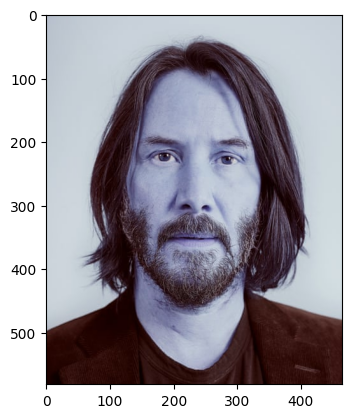

In [7]:
plt.imshow(img)

#### Here's a grayscale conversion of the image. We can see that the channel value has been removed.

In [8]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(581, 465)

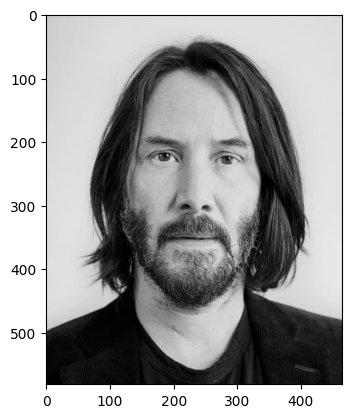

In [10]:
plt.imshow(gray_img, cmap='gray')

#### Several Haar Cascades have been imported from opencv documentation. We will use the frontalface_default and eye cascades to detect faces with 2 visible eyes.

In [11]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/./haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
faces

array([[101, 120, 272, 272]], dtype=int32)

#### Lets plot a rectangle outlining the detected face.

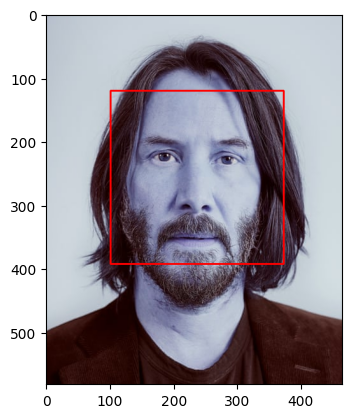

In [16]:
(x,y,w,h) = faces[0]
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

#### Here we plot the eye outlines as well as the face outline. The face is marked as an 'roi' or region of interest.

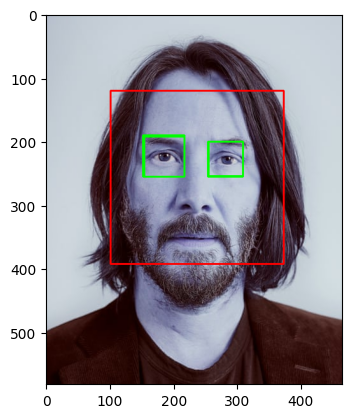

In [37]:
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

#### Here's a cropped preview of the roi with 2 eyes outlined.

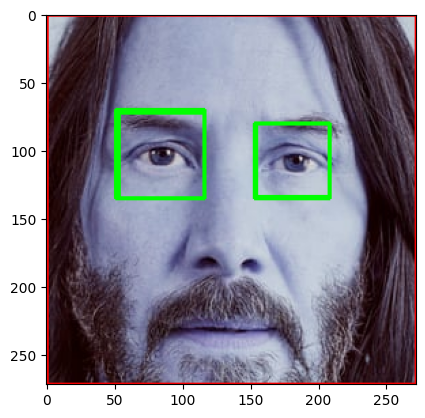

In [41]:
plt.imshow(roi_color)

#### This function defines a function that: 1. Reads an image from the given path. 2. Grayscale conversion. 3. Face and Eye detection through Haar Cascades.

In [49]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

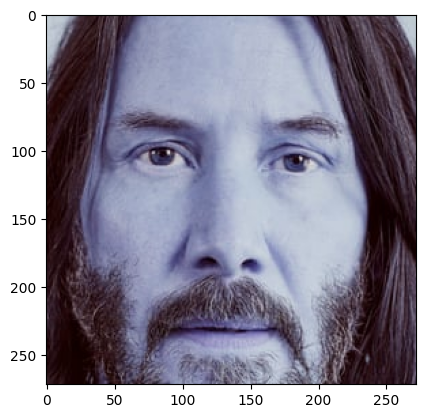

In [46]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/keanu reeves/3662.jpg')
plt.imshow(cropped_image)